In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Section 1

In [2]:
quality = 200 # mettre à 500 à la fin

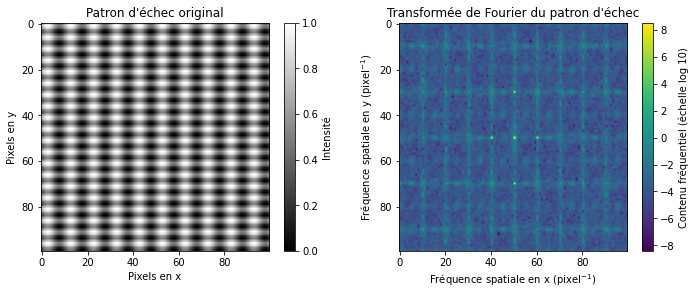

In [3]:
check = plt.imread('im1_checkboard.png')
Check = np.fft.fft2(check)
Check = np.fft.fftshift(Check)

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
im1 = plt.imshow(check, cmap='gray')
plt.title("Patron d'échec original")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb1 = plt.colorbar(im1)
cb1.set_label('Intensité')

plt.subplot(1,2,2)
im2 = plt.imshow(np.log(np.abs(Check)))
plt.title("Transformée de Fourier du patron d'échec")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb2 = plt.colorbar(im2)
cb2.set_label('Contenu fréquentiel (échelle log 10)')

plt.tight_layout()
plt.savefig("check", dpi = quality)

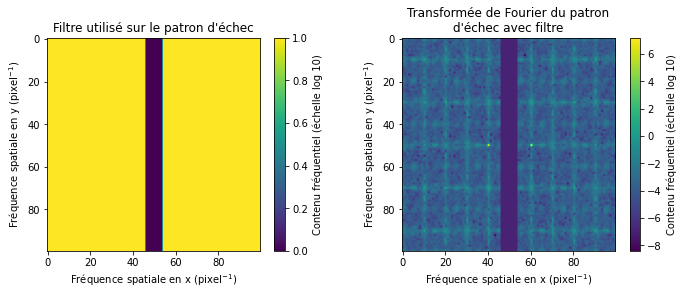

In [4]:
rows, cols = Check.shape

epaisseur = 4
w = np.ones((rows, cols))
w[:, cols // 2 - epaisseur: cols // 2 + epaisseur] = 0

Check_f = Check * w
Check_f_show = Check_f.copy()
Check_f_show[Check_f_show == 0] = 1e-3

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
im1 = plt.imshow(w)
plt.title("Filtre utilisé sur le patron d'échec")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb1 = plt.colorbar(im1)
cb1.set_label('Contenu fréquentiel (échelle log 10)')

plt.subplot(1,2,2)
im2 = plt.imshow(np.log(np.abs(Check_f_show)))
plt.title("Transformée de Fourier du patron\nd'échec avec filtre")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb2 = plt.colorbar(im2)
cb2.set_label('Contenu fréquentiel (échelle log 10)')

plt.tight_layout()
plt.savefig("check_mask", dpi = quality)

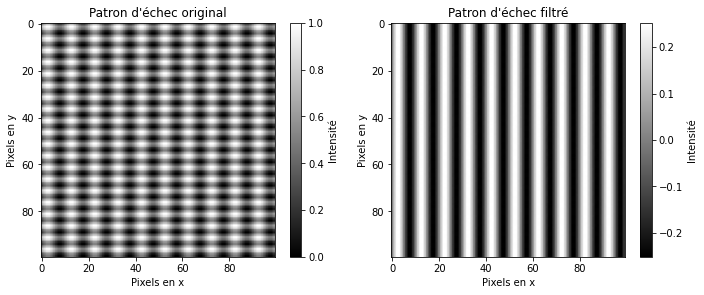

In [5]:
Check_f_unshifted = np.fft.fftshift(Check_f)
check_f = np.fft.ifft2(Check_f_unshifted).real

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
im1 = plt.imshow(check, cmap='gray')
plt.title("Patron d'échec original")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb1 = plt.colorbar(im1)
cb1.set_label('Intensité')

plt.subplot(1,2,2)
im2 = plt.imshow(check_f, cmap='gray')
plt.title("Patron d'échec filtré")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb2 = plt.colorbar(im2)
cb2.set_label('Intensité')

plt.tight_layout()
plt.savefig("check_filtre", dpi = quality)

# Section 2

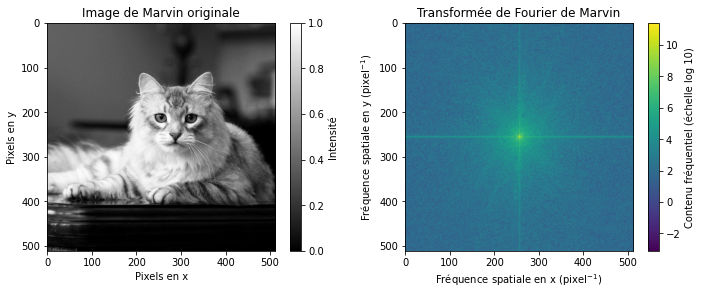

In [6]:
marvin = plt.imread('marvin_clean.png')
Marvin = np.fft.fft2(marvin) # compute fft2
Marvin = np.fft.fftshift(Marvin) # shift fft2

plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
im1 = plt.imshow(marvin, cmap='gray')
plt.title("Image de Marvin originale")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb1 = plt.colorbar(im1)
cb1.set_label('Intensité')

plt.subplot(1,2,2)
im2 = plt.imshow(np.log(np.abs(Marvin)))
plt.title("Transformée de Fourier de Marvin")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb2 = plt.colorbar(im2)
cb2.set_label('Contenu fréquentiel (échelle log 10)')

plt.tight_layout()
plt.savefig("marvin_og", dpi = quality)

In [7]:
def top_hat(fc):
    w = np.ones(marvin.shape)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            r2 = (i-511/2)**2 + (j-511/2)**2
            if r2 > fc**2:
                w[i,j] = 0
    
    Marvin_filtered = Marvin*w
    
    plt.figure(figsize=[9,7])
    
    plt.subplot(2,2,1)
    im1 = plt.imshow(w)
    plt.title(r"Filtre passe-bas top-hat $f_c = $"+f"{fc}")
    plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
    plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
    cb1 = plt.colorbar(im1)
    cb1.set_label('Contenu fréquentiel')

    plt.subplot(2,2,2)
    im2 = plt.imshow(np.log(np.abs(Marvin))*w)
    plt.title("Transformée de Fourier de Marvin avec\nfiltre "+r"passe-bas top-hat $f_c = $"+f"{fc}")
    plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
    plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
    cb2 = plt.colorbar(im2)
    cb2.set_label('Contenu fréquentiel (échelle log 10)')

    Marvin_filtered_unshifted = np.fft.fftshift(Marvin_filtered)  # Unshift
    marvin_filtered = np.fft.ifft2(Marvin_filtered_unshifted).real

    plt.subplot(2,2,3)
    im3 = plt.imshow(marvin_filtered, cmap='gray')
    plt.title("Image de Marvin filtrée")
    plt.xlabel("Pixels en x")
    plt.ylabel("Pixels en y")
    cb3 = plt.colorbar(im3)
    cb3.set_label('Intensité')

    plt.subplot(2,2,4)
    im4 = plt.imshow(marvin_filtered[60:210, 140:290], cmap='gray')
    plt.title("Zoom sur l'oreille de Marvin après filtre")
    plt.xlabel("Pixels en x")
    plt.ylabel("Pixels en y")
    cb4 = plt.colorbar(im4)
    cb4.set_label('Intensité')

    plt.tight_layout()
    plt.savefig(f"marvin_post_filter_fc_{fc}", dpi = quality)

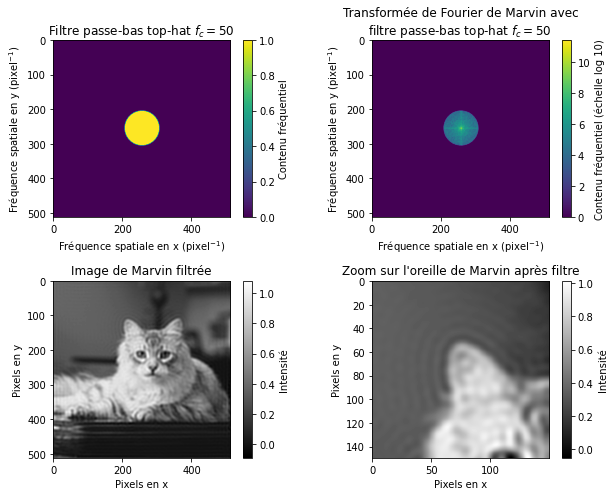

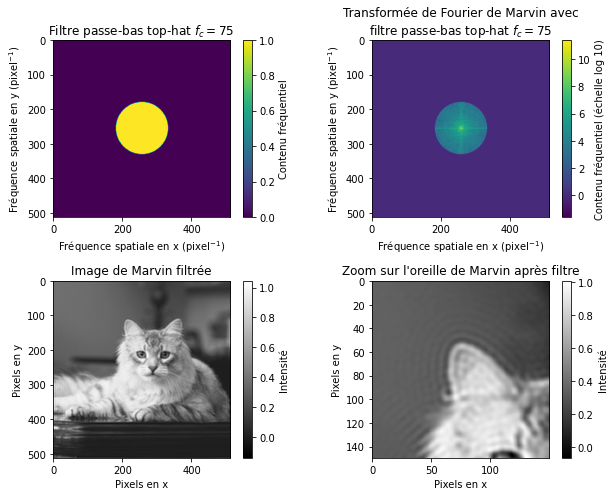

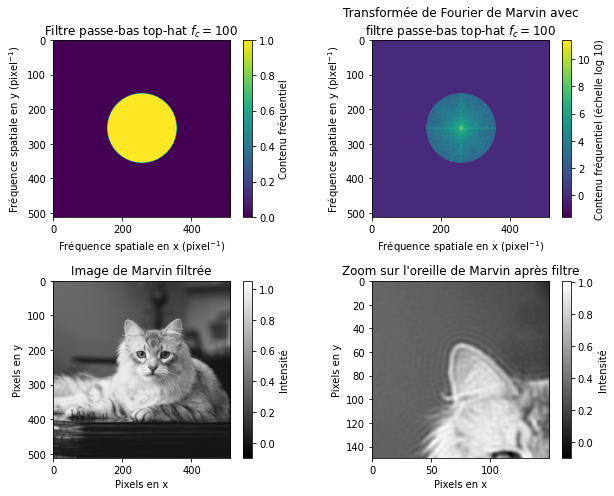

In [8]:
top_hat(50)
top_hat(75)
top_hat(100)

# Section 3

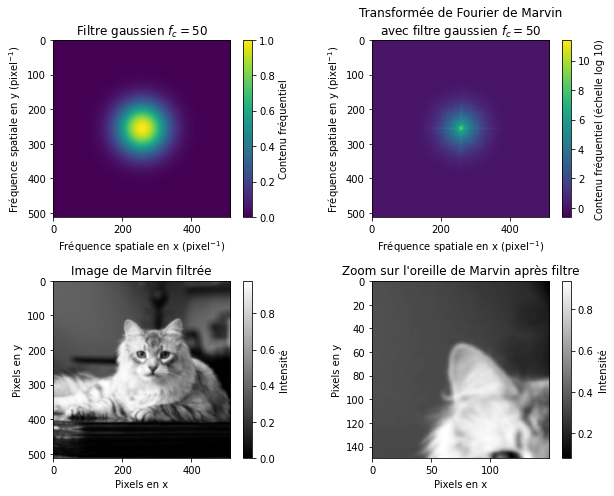

In [9]:
marvin = plt.imread('marvin_clean.png')
Marvin = np.fft.fftshift(np.fft.fft2(marvin))  # Perform 2D FFT and shift

# Creation of Gaussian window
w = np.zeros(marvin.shape)
fc = 50  # Cutoff frequency
center = np.array([marvin.shape[0] / 2, marvin.shape[1] / 2])  # Center of the image

for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        # Calculate distance from the center
        r2 = (i - center[0])**2 + (j - center[1])**2
        # Gaussian filter function
        w[i, j] = np.exp(-r2 / (2 * fc**2))

# Apply Gaussian filter to the 2D FFT of the image
Marvin_filtered = Marvin * w

plt.figure(figsize=[9,7])
    
plt.subplot(2,2,1)
im1 = plt.imshow(w)
plt.title(r"Filtre gaussien $f_c = $"+f"{fc}")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb1 = plt.colorbar(im1)
cb1.set_label('Contenu fréquentiel')

plt.subplot(2,2,2)
im2 = plt.imshow(np.log(np.abs(Marvin))*w)
plt.title("Transformée de Fourier de Marvin\navec filtre "+r"gaussien $f_c = $"+f"{fc}")
plt.xlabel(r"Fréquence spatiale en x (pixel$^{-1}$)")
plt.ylabel(r"Fréquence spatiale en y (pixel$^{-1}$)")
cb2 = plt.colorbar(im2)
cb2.set_label('Contenu fréquentiel (échelle log 10)')

Marvin_filtered_unshifted = np.fft.fftshift(Marvin_filtered)  # Unshift
marvin_filtered = np.fft.ifft2(Marvin_filtered_unshifted).real

plt.subplot(2,2,3)
im3 = plt.imshow(marvin_filtered, cmap='gray')
plt.title("Image de Marvin filtrée")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb3 = plt.colorbar(im3)
cb3.set_label('Intensité')

plt.subplot(2,2,4)
im4 = plt.imshow(marvin_filtered[60:210, 140:290], cmap='gray')
plt.title("Zoom sur l'oreille de Marvin après filtre")
plt.xlabel("Pixels en x")
plt.ylabel("Pixels en y")
cb4 = plt.colorbar(im4)
cb4.set_label('Intensité')

plt.tight_layout()
plt.savefig(f"marvin_gauss_fc_{fc}", dpi = quality)